# Volcanic rock compositions in South America Holocene

Import data from: http://volcano.si.edu/list_volcano_holocene.cfm

Save the downloaded file as a csv-file.

Use TextWrangler's Find function to replace commas (,) with periods (.).

#### First import modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import additional modules:**

*Import **Basemap** in order to plot onto a map. First open a new Terminal window, and type: conda install Basemap. After installation you can import it.*

*Import **colors** for scatter plots and colorbar.*

*Import **cm** for cmap.*

*Import **plt.rcParams['figure.figsize']** to assign figure size.*

*Import **inset_axes** for positioning a background box for the legend.*

*Import **Rectangle** for making a background box for the legend.*

In [11]:
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib import cm
plt.rcParams['figure.figsize'] = [6,12]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

#### Set path to data:

In [3]:
#fp = "/Users/Nellimetiainen/Desktop//a1.csv"

In [4]:
fp = "/Users/Nellimetiainen/Desktop//a2.csv"

#### Set dataframe:

In [5]:
dataFrame = pd.read_csv(fp, sep=';', skiprows=1, encoding='latin 1')

### New columns with separate values for rock types

In [6]:
#dataFrame['Mafic'] = dataFrame['SA rock type'].loc[(dataFrame['SA rock type'] == 2)]
#dataFrame['Intermediate'] = dataFrame['SA rock type'].loc[(dataFrame['SA rock type'] == 3)]
#dataFrame['Felsic'] = dataFrame['SA rock type'].loc[(dataFrame['SA rock type'] == 4)]

In [7]:
dataFrame['Mafic'] = dataFrame['SA rock type'].loc[(dataFrame['SA rock type'] == 1)]
dataFrame['Intermediate'] = dataFrame['SA rock type'].loc[(dataFrame['SA rock type'] == 2)]
dataFrame['Felsic'] = dataFrame['SA rock type'].loc[(dataFrame['SA rock type'] == 3)]
dataFrame['Mildly alkaline'] = dataFrame['SA rock type'].loc[(dataFrame['SA rock type'] == 4)]
dataFrame['Strongly alkaline'] = dataFrame['SA rock type'].loc[(dataFrame['SA rock type'] == 5)]

#### Select wanted columns and set new dataframe:

In [8]:
select_cols = ['Volcano Number','Volcano Name','Country','South America primary volcano type','Primary Volcano Type','Activity Evidence','Last Known Eruption', 'Latitude','Longitude','Elevation (m)','SA rock type','Dominant Rock Type','Tectonic Setting','Mafic','Intermediate','Felsic', 'Mildly alkaline', 'Strongly alkaline']
selected_data = dataFrame[select_cols]

### Select data by coordinates
Select wanted data for South American volcanoes by determining coordinates: (Make sure to use select_lat instead of dataFrame for determining longitude.)

In [9]:
select_lat = dataFrame.loc[(dataFrame['Latitude'] <= 7.995) & (dataFrame['Latitude'] >= -55.361)]
select_lon = select_lat.loc[(select_lat['Longitude'] <= -60.175) & (select_lat['Longitude'] >= -84.982)]
print(select_lon)

     Volcano Number                  Volcano Name           Country  \
0            351011                       Romeral          Colombia   
1            351012                  Bravo. Cerro          Colombia   
2            351020              Ruiz. Nevado del          Colombia   
3            351021                  Santa Isabel          Colombia   
4            351030            Tolima. Nevado del          Colombia   
5            351040                        Machin          Colombia   
6            351050             Huila. Nevado del          Colombia   
7            351060                        Purace          Colombia   
8            351061                        Sotara          Colombia   
9            351062                       Petacas          Colombia   
10           351070                    Dona Juana          Colombia   
11           351080                       Galeras          Colombia   
12           351090                       Azufral          Colombia   
13    

# Plotting data

### Main 3 rock composition types map (mafic, intermediate, felsic)

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


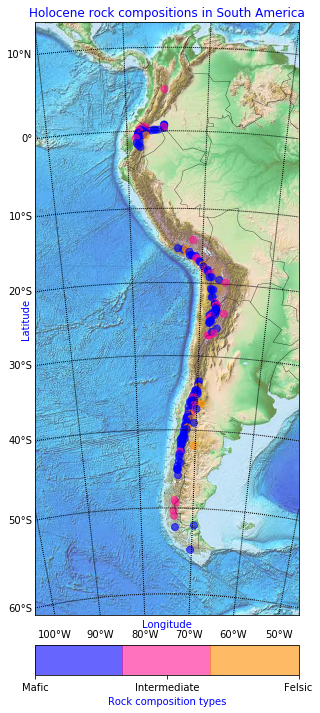

In [25]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [12,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Determine colors for colormap:
cmap = mpl.colors.ListedColormap(['b','deeppink','darkorange'])

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=select_lon["SA rock type"], cmap=cmap, alpha=0.6)

# Set grid for parallels and meridians:   
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene rock compositions in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 4)
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(2, 4, 4)
# Set min and max values with clim:
plt.clim(2, 4)
# Make colorbar - specify where it's dispalyed with location, pad = space between figure and bar, include boundaries:
cbar = m.colorbar(cmap=cmap, ticks=[2, 3, 4], boundaries=bounds, location='bottom',pad="5%")
cbar.ax.set_xticklabels(['Mafic', 'Intermediate', 'Felsic'])
# Colorbar title:
cbar.set_label('Rock composition types', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Save figure as picture:
plotFile = str('rocktypes_all') + ".png"
plt.savefig(savepath+plotFile)

# Display plot:
plt.show()

### All rock composition types map (mafic, intermediate, felsic, mildly alkaline, strongly alkaline)

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


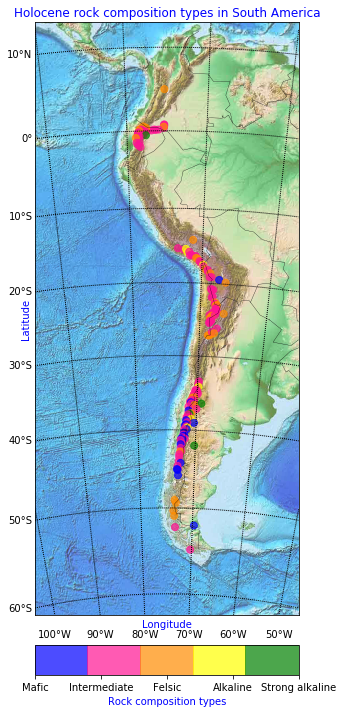

In [16]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [12,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Determine colors for colormap:
cmap = mpl.colors.ListedColormap(['b','deeppink','darkorange','yellow','green'])

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=select_lon["SA rock type"], cmap=cmap, alpha=0.7)

# Set grid for parallels and meridians:   
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene rock composition types in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma', 6)
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(1, 5, 6)
# Set min and max values with clim:
plt.clim(1, 5)
# Make colorbar - specify where it's dispalyed with location, pad = space between figure and bar, include boundaries:
cbar = m.colorbar(cmap=cmap, ticks=[0, 1, 2, 3, 4, 5, 6], boundaries=bounds, location='bottom',pad="5%")
cbar.ax.set_xticklabels(['Mafic', 'Intermediate', 'Felsic', 'Alkaline', 'Strong alkaline'])
# Colorbar title:
cbar.set_label('Rock composition types', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Save figure as picture:
plotFile = str('rocktypes_all_alk') + ".png"
plt.savefig(savepath+plotFile)

# Display plot:
plt.show()

## All compositions map + bars

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


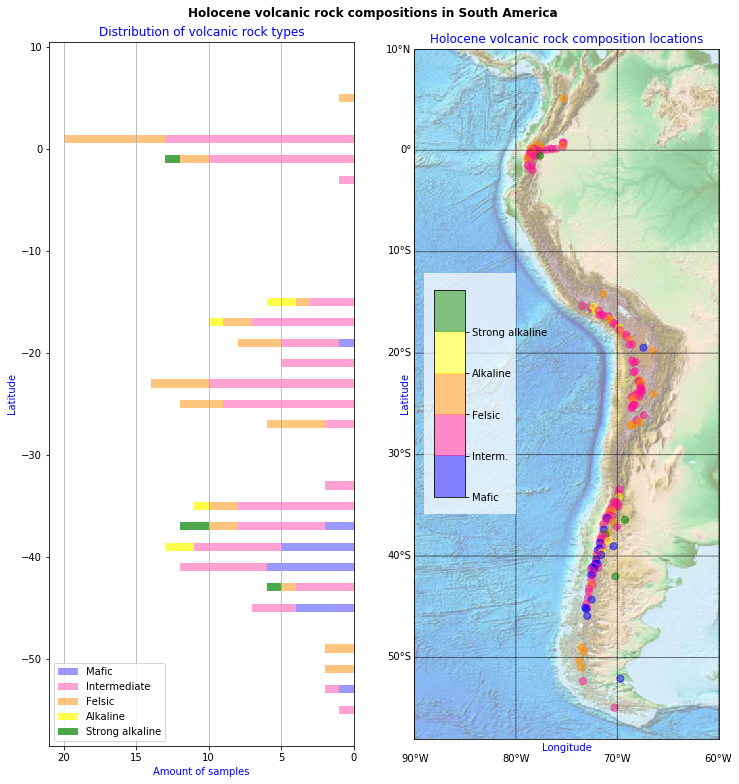

In [15]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [12,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

## Set up for bar plot:
# Make a bar every 2 degrees latitude:
barIncrement = 2
barBins= np.arange(8, -56, -barIncrement)
# Determine the length of bars:
numBars = len(barBins)
# Separate different depth earthquakes:
maficCount = np.zeros(numBars)
intermediateCount = np.zeros(numBars)
felsicCount = np.zeros(numBars)
alkalineCount = np.zeros(numBars)
strongalkalineCount = np.zeros(numBars)

# Set up figure for subplots:
f, ax = plt.subplots(nrows=1, ncols=2)

# Title for whole figure:
plt.suptitle('Holocene volcanic rock compositions in South America', fontweight='bold')

# Make bar plot (set axis, load values):
for i in range(numBars):
            numMafic = select_lon['Mafic'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            maficCount[i] = maficCount[i] + numMafic
            
            numIntermediate = select_lon['Intermediate'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            intermediateCount[i] = intermediateCount[i] + numIntermediate
            
            numFelsic = select_lon['Felsic'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            felsicCount[i] = felsicCount[i] + numFelsic
            
            numAlkaline = select_lon['Mildly alkaline'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            alkalineCount[i] = alkalineCount[i] + numAlkaline
            
            numStrongalkaline = select_lon['Strongly alkaline'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            strongalkalineCount[i] = strongalkalineCount[i] + numStrongalkaline

# Plot bars:            
ax[0].barh(y=barBins-(barIncrement/2), width=maficCount, label='Mafic', color='b', alpha=0.4)
ax[0].barh(y=barBins-(barIncrement/2), width=intermediateCount, left=maficCount, label='Intermediate', color='deeppink', alpha=0.4) 
ax[0].barh(y=barBins-(barIncrement/2), width=felsicCount, left=maficCount+intermediateCount, label='Felsic', color='darkorange', alpha=0.5)
ax[0].barh(y=barBins-(barIncrement/2), width=alkalineCount, left=maficCount+intermediateCount+felsicCount, label='Alkaline', color='yellow', alpha=0.7)
ax[0].barh(y=barBins-(barIncrement/2), width=strongalkalineCount, left=maficCount+intermediateCount+felsicCount+alkalineCount, label='Strong alkaline', color='green', alpha=0.7)

# Set limits:
totalCount = maficCount + intermediateCount + felsicCount + alkalineCount + strongalkalineCount
ax[0].set_xlim(totalCount.max()+1, 0)
ax[0].set_xticks(np.arange(0,25,5))

# Add grid:
ax[0].grid(axis='x')

# Add titles:
ax[0].set_title('Distribution of volcanic rock types', color='blue')
ax[0].set_xlabel('Amount of samples', color='blue')
ax[0].set_ylabel('Latitude', color='blue')

# Add legend:
ax[0].legend(fontsize='medium', loc = 3)

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)    
#m = Basemap(width=4000000,height=9000000,projection='lcc',
#resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
#m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.50)
#m.arcgisimage(service='World_Physical_Map')

# Determine custom colors on colorbar:
cmap = mpl.colors.ListedColormap(['b','deeppink','darkorange', 'yellow', 'green'])

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=select_lon["SA rock type"], cmap=cmap, alpha=0.5)

# Set grid:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene volcanic rock composition locations', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(1, 6, 6)
#ticks1 = ['Mafic','Intermediate','Felsic']
# Set min and max values with clim:
plt.clim(1, 6)
# White background box for colorbar:
cbbox = inset_axes(ax[1], '30%', '35%', loc = 6, borderpad=1)
[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
cbbox.set_facecolor([1,1,1,0.7])
axins1 = inset_axes(ax[1], width="10%", height="30%", loc=6, borderpad=2)
# Make colorbar - specify where it's dispalyed with location, pad = space between figure and bar, include boundaries:
cbar = plt.colorbar(cax=axins1, ticks=[1, 2, 3, 4, 5], cmap=cmap, orientation="vertical", boundaries=bounds)
cbar.ax.set_yticklabels(['Mafic', 'Interm.', 'Felsic', 'Alkaline', 'Strong alkaline'])

# Colorbar title:
#cbar.set_label('Rock types')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Make space between main title and plots: 
plt.subplots_adjust(top=0.94)

# Save figure as a picture:
plotFile = str('SA rock type_bar+map_1') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

## Mafic rock composition map

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


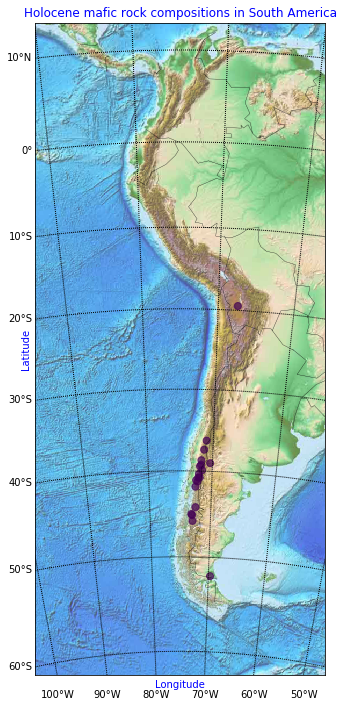

In [18]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=select_lon["Mafic"], alpha=0.7)

# Set grid for parallels and meridians:   
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene mafic rock compositions in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Save figure as picture:
plotFile = str('mafic') + ".png"
plt.savefig(savepath+plotFile)

# Display plot:
plt.show()

## Intermediate rock composition map

In [19]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=select_lon["Intermediate"], alpha=0.7)

# Set grid for parallels and meridians:   
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene intermediate rock compositions in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Save figure as picture:
plotFile = str('intermediate') + ".png"
plt.savefig(savepath+plotFile)

# Display plot:
plt.show()

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


## Felsic rock composition map

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


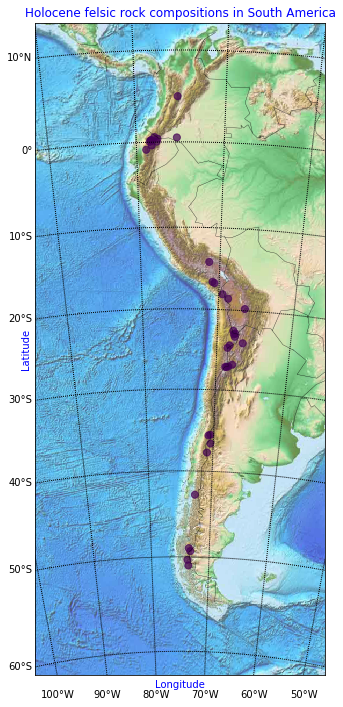

In [20]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=select_lon["Felsic"], alpha=0.7)

# Set grid for parallels and meridians:   
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene felsic rock compositions in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Save figure as picture:
plotFile = str('felsic') + ".png"
plt.savefig(savepath+plotFile)

# Display plot:
plt.show()

## Mildly alkaline rock composition map

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


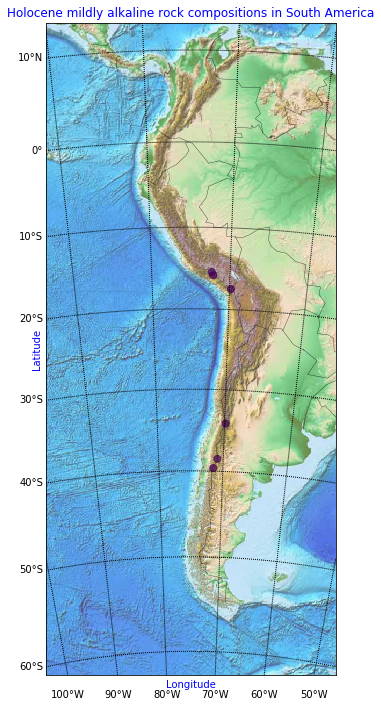

In [21]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=select_lon["Mildly alkaline"], alpha=0.7)

# Set grid for parallels and meridians:   
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene mildly alkaline rock compositions in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Save figure as picture:
plotFile = str('mild_alk') + ".png"
plt.savefig(savepath+plotFile)

# Display plot:
plt.show()

## Strongly alkaline rock composition map

In [22]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=select_lon["Strongly alkaline"], alpha=0.7)

# Set grid for parallels and meridians:   
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene strongly alkaline rock compositions in South America', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Save figure as picture:
plotFile = str('strong_alk') + ".png"
plt.savefig(savepath+plotFile)

# Display plot:
plt.show()

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


### Side by side comparison rock type map and bar plot

In [23]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [12,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

## Set up for bar plot:
# Make a bar every 2 degrees latitude:
barIncrement = 2
barBins= np.arange(8, -56, -barIncrement)
# Determine the length of bars:
numBars = len(barBins)
# Separate different depth earthquakes:
maficCount = np.zeros(numBars)
intermediateCount = np.zeros(numBars)
felsicCount = np.zeros(numBars)

# Set up figure for subplots:
f, ax = plt.subplots(nrows=1, ncols=2)

# Title for whole figure:
plt.suptitle('Holocene volcanic rock compositions in South America', fontweight='bold')

# Make bar plot (set axis, load values):
for i in range(numBars):
            numMafic = select_lon['Mafic'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            maficCount[i] = maficCount[i] + numMafic
            
            numIntermediate = select_lon['Intermediate'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            intermediateCount[i] = intermediateCount[i] + numIntermediate
            
            numFelsic = select_lon['Felsic'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            felsicCount[i] = felsicCount[i] + numFelsic

# Plot bars:            
ax[0].barh(y=barBins-(barIncrement/2), width=maficCount, label='Mafic', color='dodgerblue', alpha=0.7)
ax[0].barh(y=barBins-(barIncrement/2), width=intermediateCount, left=maficCount, label='Intermediate', color='darkorange', alpha=0.7) 
ax[0].barh(y=barBins-(barIncrement/2), width=felsicCount, left=maficCount+intermediateCount, label='Felsic', color='mediumvioletred', alpha=0.7)

# Set limits:
totalCount = maficCount + intermediateCount + felsicCount 
ax[0].set_xlim(totalCount.max()+1, 0)
ax[0].set_xticks(np.arange(0,25,5))

# Add grid:
ax[0].grid(axis='x')

# Add titles:
ax[0].set_title('Distribution of volcanic rock types', color='blue')
ax[0].set_xlabel('Amount of samples', color='blue')
ax[0].set_ylabel('Latitude', color='blue')

# Add legend:
ax[0].legend(fontsize='medium', loc = 3)

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)    
#m = Basemap(width=4000000,height=9000000,projection='lcc',
#resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
#m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)
#m.arcgisimage(service='World_Physical_Map')

# Determine custom colors on colorbar:
cmap = mpl.colors.ListedColormap(['dodgerblue','darkorange','mediumvioletred'])

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=select_lon["SA rock type"], cmap=cmap, alpha=0.7)

# Set grid:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene volcanic rock composition locations', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(2, 4, 4)
#ticks1 = ['Mafic','Intermediate','Felsic']
# Set min and max values with clim:
plt.clim(2, 4)
# White background box for colorbar:
cbbox = inset_axes(ax[1], '30%', '35%', loc = 6, borderpad=1)
[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
cbbox.set_facecolor([1,1,1,0.7])
axins1 = inset_axes(ax[1], width="10%", height="30%", loc=6, borderpad=2)
# Make colorbar - specify where it's dispalyed with location, pad = space between figure and bar, include boundaries:
cbar = plt.colorbar(cax=axins1, ticks=[2, 3, 4], cmap=cmap, orientation="vertical", boundaries=bounds)
cbar.ax.set_yticklabels(['Mafic', 'Interm.', 'Felsic'])

# Make space between main title and plots: 
plt.subplots_adjust(top=0.94)

# Save figure as a picture:
plotFile = str('SA rock type_bar+map') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


## Other version (no legend on map)

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


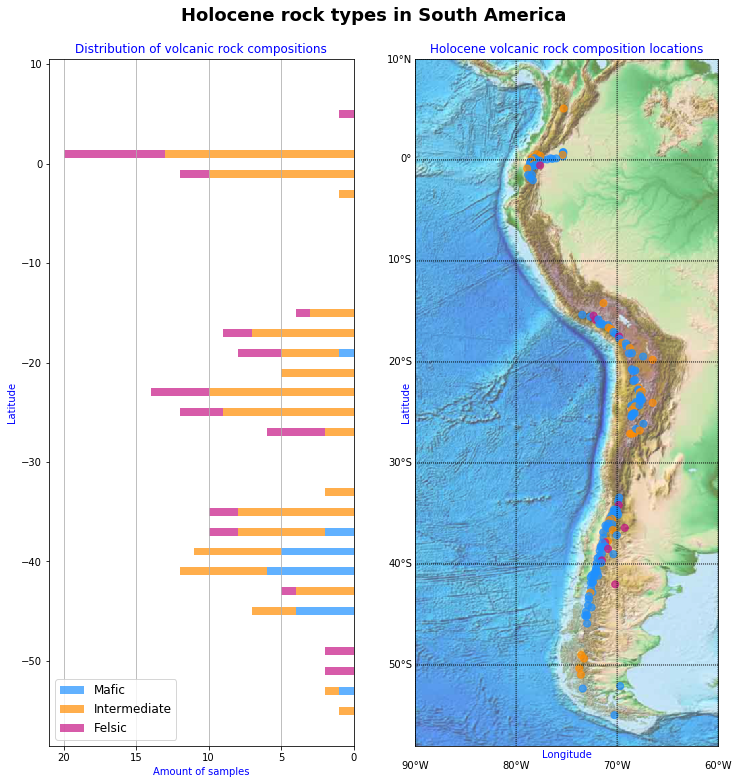

In [24]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [12,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

## Set up for bar plot:
# Make a bar every 2 degrees latitude:
barIncrement = 2
barBins= np.arange(8, -56, -barIncrement)
# Determine the length of bars:
numBars = len(barBins)
# Separate different depth earthquakes:
maficCount = np.zeros(numBars)
intermediateCount = np.zeros(numBars)
felsicCount = np.zeros(numBars)

# Set up figure for subplots:
f, ax = plt.subplots(nrows=1, ncols=2)

# Title for whole figure:
plt.suptitle('Holocene rock types in South America', fontsize=18, fontweight='bold')

# Make bar plot (set axis, load values):
for i in range(numBars):
            numMafic = select_lon['Mafic'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            maficCount[i] = maficCount[i] + numMafic
            
            numIntermediate = select_lon['Intermediate'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            intermediateCount[i] = intermediateCount[i] + numIntermediate
            
            numFelsic = select_lon['Felsic'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            felsicCount[i] = felsicCount[i] + numFelsic

# Plot bars:            
ax[0].barh(y=barBins-(barIncrement/2), width=maficCount, label='Mafic', color='dodgerblue', alpha=0.7)
ax[0].barh(y=barBins-(barIncrement/2), width=intermediateCount, left=maficCount, label='Intermediate', color='darkorange', alpha=0.7) 
ax[0].barh(y=barBins-(barIncrement/2), width=felsicCount, left=maficCount+intermediateCount, label='Felsic', color='mediumvioletred', alpha=0.7)

# Set limits:
totalCount = maficCount + intermediateCount + felsicCount 
ax[0].set_xlim(totalCount.max()+1, 0)
ax[0].set_xticks(np.arange(0,25,5))

# Add grid:
ax[0].grid(axis='x')

# Add titles:
ax[0].set_title('Distribution of volcanic rock compositions', color='blue')
ax[0].set_xlabel('Amount of samples', color='blue')
ax[0].set_ylabel('Latitude', color='blue')

# Add legend:
ax[0].legend(fontsize='large', loc = 3)

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)    
#m = Basemap(width=4000000,height=9000000,projection='lcc',
#resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
#m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)
#m.arcgisimage(service='World_Physical_Map')

cmap = mpl.colors.ListedColormap(['dodgerblue','darkorange','mediumvioletred'])

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=select_lon["SA rock type"], cmap=cmap, alpha=0.7)

x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene volcanic rock composition locations', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Make space between main title and plots: 
plt.subplots_adjust(top=0.92)

# Save figure as a picture:
plotFile = str('SA rock type_1') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")